# Assignment 13 : Decision Tree

## Objective :
  To Apply Decision Tree Classification technique ( algorithm) to the given dataset, and analyse the performance of the model, and interpret the results.

## Data Description :

- **age** : Age in years
- **Gender**: Gender Male -1 , Female - 0
- **cp**: Chest pain type
- **trestbps**:Resting blood pressure
- **chol**:cholesterol measure
- **fbs**:(fasting blood suger > 120 mg/dl) (1 - True, 0 - False)
- **restecg**:ecg
- **thalch**: maximum heart rate achieved
- **exang**: exercise induced angina
- **oldpeak**:ST depression induced by exercise relative to rest.
- **slope**: the slope of the peak exercise ST segment.
- **thal**: Thal
- **num**: Targer feature [ 0 - no heart disease, 1,2,3,4 - Stage of the heart disesase ]

##

## Task 1 : Data Preparation

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the dataset.
data = pd.read_excel("heart_disease.xlsx",sheet_name="Heart_disease")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


## Dataset Interpretation:
- It has 13 features (columns).
- 908 Records ( rows).
- It contains:
   1- float feature
   5 - integer features
   6 - object ( string) features.
- except oldpeak all other features have no  null values.
- Need to convert few data types to categorical and treat them.

## Task 2 : Exploratory Data Analysis (EDA)

In [5]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
5,66,Male,asymptomatic,160,228,False,lv hypertrophy,138,False,2.3,upsloping,fixed defect,0
6,56,Male,non-anginal,130,276,False,normal,128,True,1.0,upsloping,fixed defect,0
7,48,Male,non-anginal,110,211,False,normal,138,False,0.0,downsloping,fixed defect,0
8,57,Male,atypical angina,140,260,True,normal,140,False,0.0,downsloping,fixed defect,0
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0


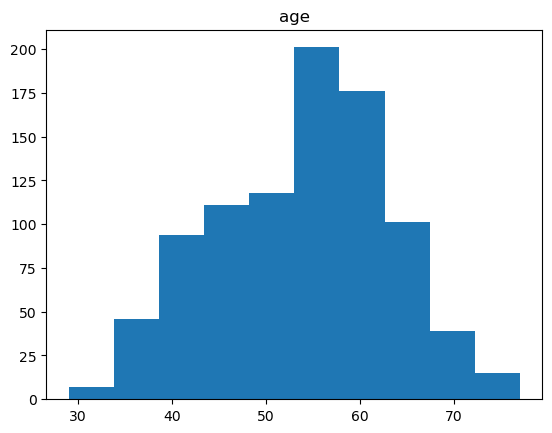

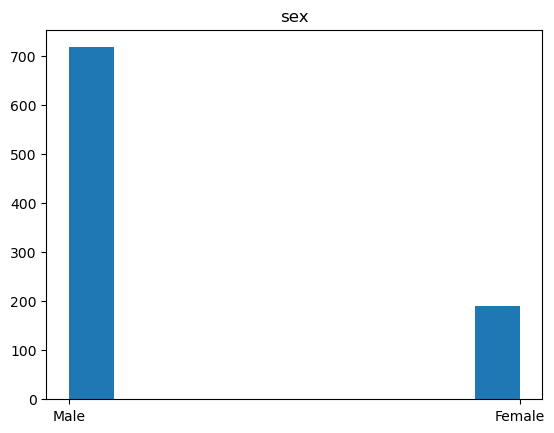

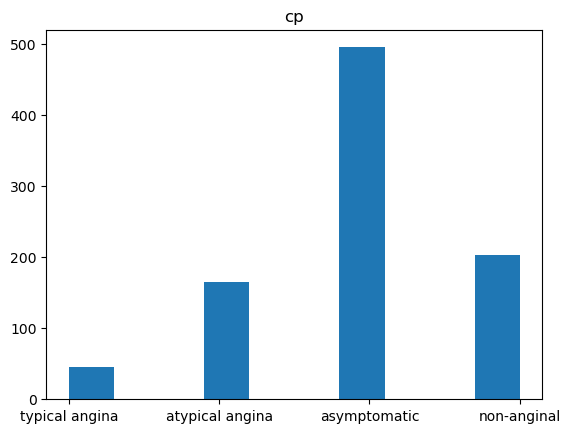

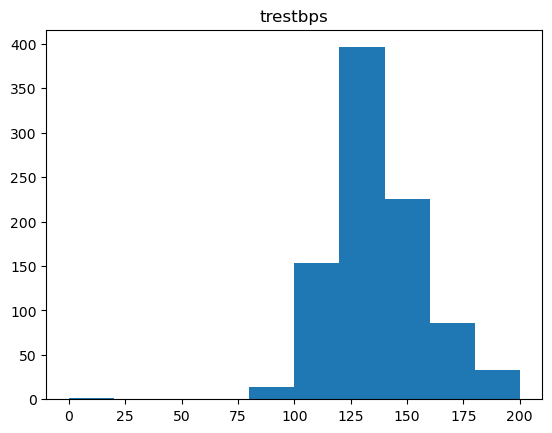

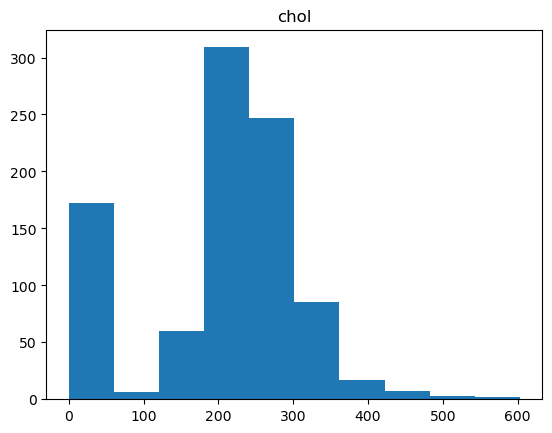

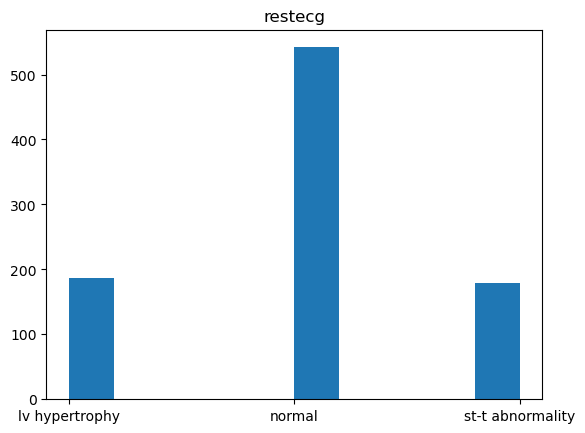

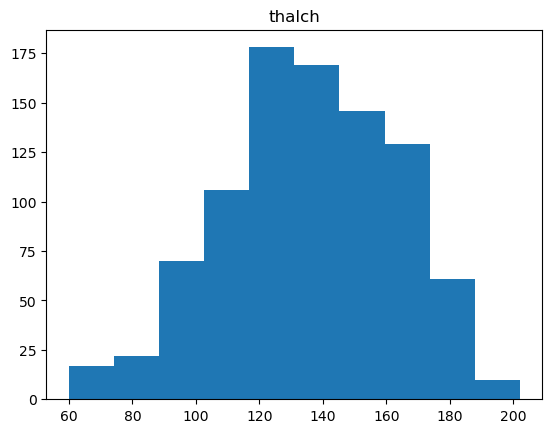

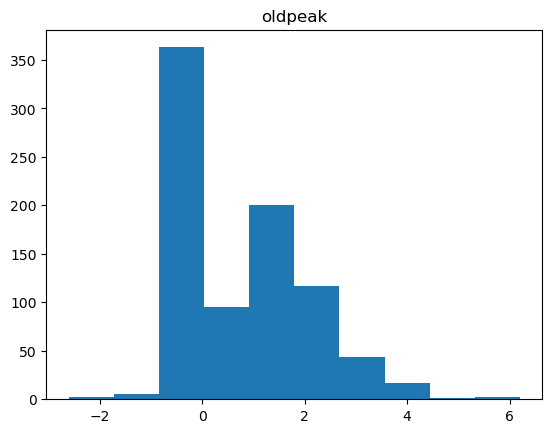

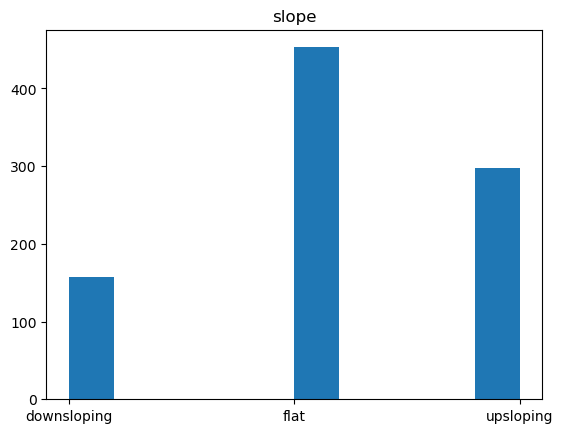

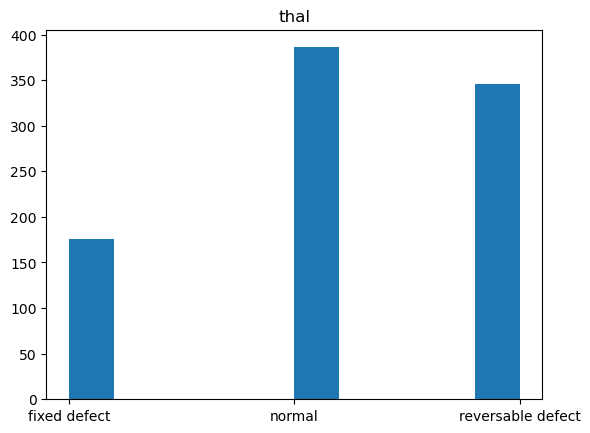

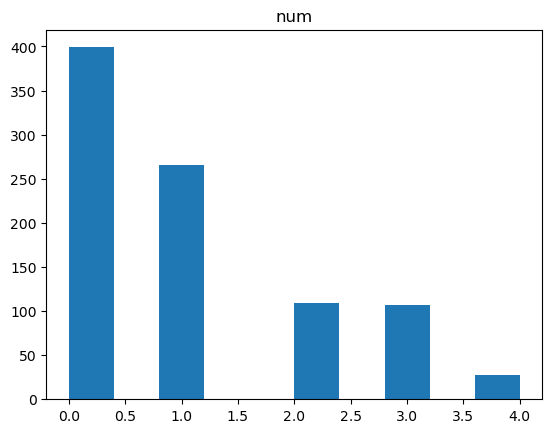

In [6]:
# plotting the histogram to each feature and visualize the spread.
columns = data.columns
columns = columns.drop("fbs")
columns = columns.drop("exang")
for column in columns:
    plt.hist(data[column])
    plt.title(column)
    plt.show()

### Histogram plots interpertation: 

- **age** : Continuous data, almost normally distributed.
- **Gender**: Categorical data,two classes present ( male,female).
- **cp**: Categorical data, four classes present ( typical angina, atypical angina, asymptomatic, non-anginal ).
- **trestbps**: Continuous data, right skewed distribution.
- **chol**: Continuous data, slightly right skewed data.
- **fbs**:boolean data,(1 - True, 0 - False).
- **restecg**:Categorical data with three classes ( hypertrophy,normal,st-t abnormality).
- **thalch**: Continuous data, almost normally distributed.
- **exang**: boolean data. ( true,false).
- **oldpeak**: Continuous data, right skewed distribution.
- **slope**: Categorical data with Three classes ( downsloping, flat, upsloping).
- **thal**: Categorical data with three classes ( fixed defect, normal, reversable defect).
- **num**: Targer feature, Categorical in nature.( 0 to 4)

In [7]:
# Determining the outliers for the numerical features.
columns = data.select_dtypes(include=[np.number]).columns

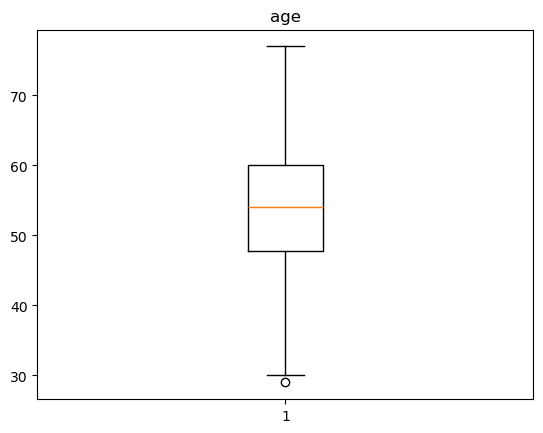

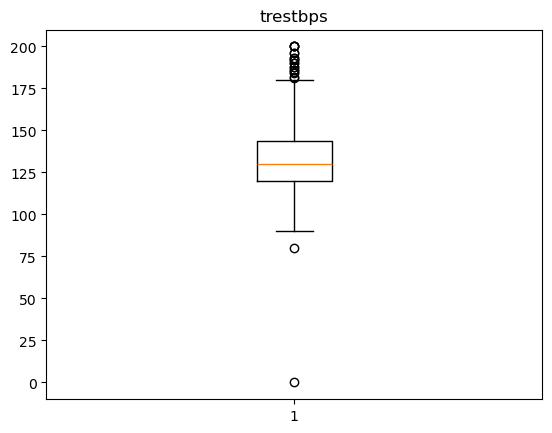

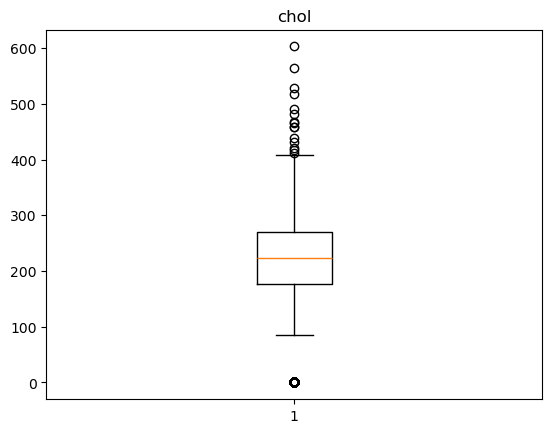

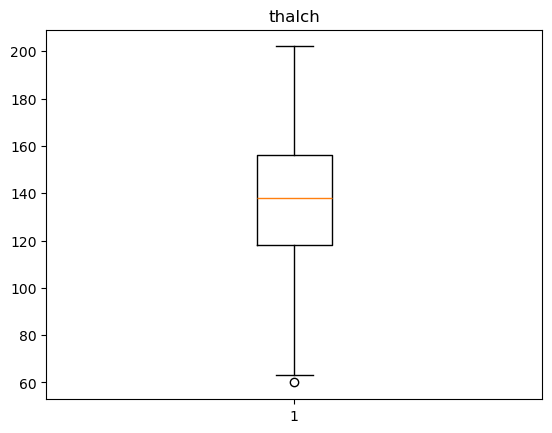

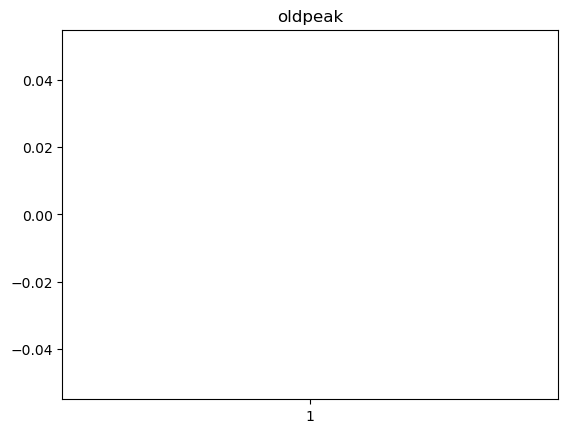

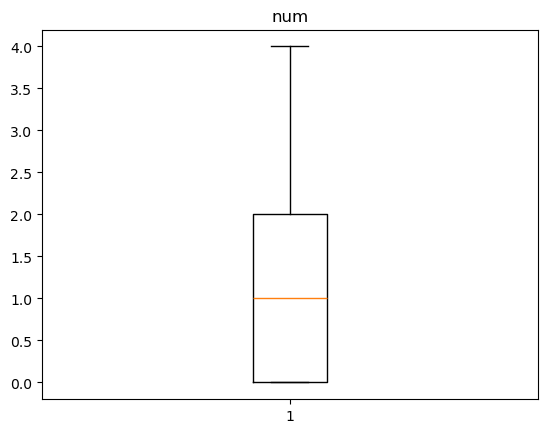

In [8]:
# using boxplot to visualize the outliers.
for column in columns:
    plt.boxplot(data[column])
    plt.title(column)
    plt.show()

### Boxplot interpretation :
all the numerical features have almost no outliers except two features.
 1. trestbps
 2. chol

In [9]:
# Visualizing the correlation using pair plot.
numerical_data = data.select_dtypes(include=[np.number])

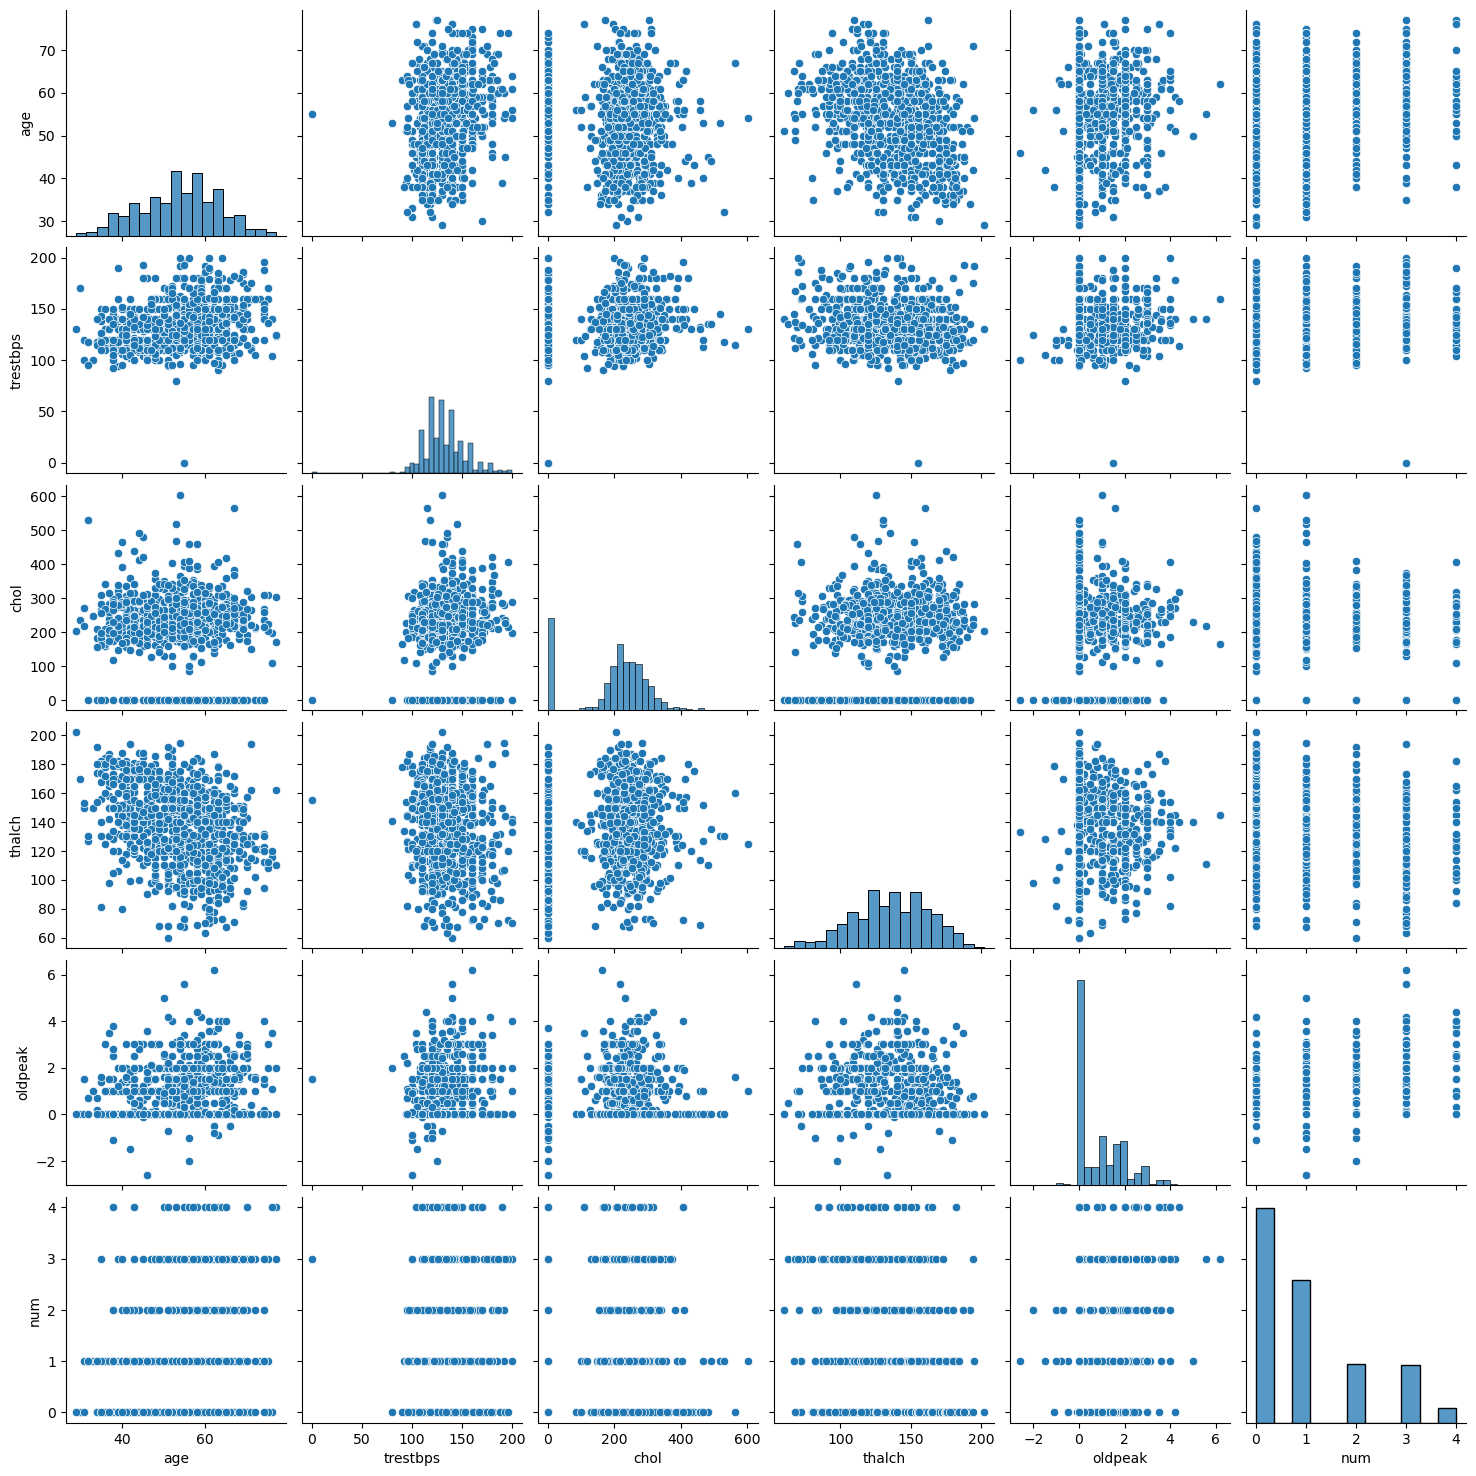

In [10]:
sns.pairplot(numerical_data)

In [11]:
# Correlation matric
numerical_data.corr()

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.029898,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,-0.323058,0.437577,1.000000


## Task 3 : Feature Engineering

In [12]:
# Using PPS for the feature selection
import ppscore as pps
pps_matrix = pps.matrix(data)

In [13]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [14]:
target_variable = 'num' 
filtered_pps = pps_matrix[pps_matrix['y'] == target_variable].sort_values(by='ppscore', ascending=False)


In [15]:
filtered_pps

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
168,num,num,1.000000,predict_itself,True,None,0.000000,1.000000,None
38,cp,num,0.082043,regression,True,mean absolute error,0.887665,0.814839,DecisionTreeRegressor()
129,oldpeak,num,0.040383,regression,True,mean absolute error,0.873522,0.838247,DecisionTreeRegressor()
25,sex,num,0.008236,regression,True,mean absolute error,0.887665,0.880355,DecisionTreeRegressor()
12,age,num,0.000822,regression,True,mean absolute error,0.887665,0.886935,DecisionTreeRegressor()
51,trestbps,num,0.000000,regression,True,mean absolute error,0.887665,0.949920,DecisionTreeRegressor()
64,chol,num,0.000000,regression,True,mean absolute error,0.887665,0.981546,DecisionTreeRegressor()
77,fbs,num,0.000000,regression,True,mean absolute error,0.887665,0.906902,DecisionTreeRegressor()
90,restecg,num,0.000000,regression,True,mean absolute error,0.887665,0.919930,DecisionTreeRegressor()
103,thalch,num,0.000000,regression,True,mean absolute error,0.887665,0.927599,DecisionTreeRegressor()


In [16]:
# By Analysing the above ppscore matrix , there is no noticable relationship between independent features and target variable.
# try to build the decision tree with all features and with few features.

In [17]:
# Encoding categorical features.
data.sex = data.sex.astype("category")
data.cp = data.cp.astype("category")
data.restecg = data.restecg.astype("category")
data.exang = data.exang.astype("category")
data.slope = data.slope.astype("category")
data.thal = data.thal.astype("category")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       908 non-null    int64   
 1   sex       908 non-null    category
 2   cp        908 non-null    category
 3   trestbps  908 non-null    int64   
 4   chol      908 non-null    int64   
 5   fbs       908 non-null    bool    
 6   restecg   908 non-null    category
 7   thalch    908 non-null    int64   
 8   exang     908 non-null    category
 9   oldpeak   846 non-null    float64 
 10  slope     908 non-null    category
 11  thal      908 non-null    category
 12  num       908 non-null    int64   
dtypes: bool(1), category(6), float64(1), int64(5)
memory usage: 49.8 KB


In [19]:
# Using One_Hot Encoding

df = pd.get_dummies(data,drop_first=True)

In [20]:
df

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.3,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,41,135,203,False,132,0.0,0,1,1,0,0,1,0,0,0,0,1,0,0,0
2,57,140,192,False,148,0.4,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,52,118,186,False,190,0.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
4,57,110,201,False,126,1.5,0,1,0,0,0,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4,1,0,0,0,1,0,0,0,0,0,1,0,1
904,62,166,170,False,120,3.0,4,1,0,0,0,0,1,1,0,0,1,0,0,1
905,56,170,0,False,123,2.5,4,1,0,1,0,0,0,1,0,0,0,0,1,0
906,56,144,208,True,105,NaN,4,1,0,1,0,0,1,0,0,1,0,0,0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       908 non-null    int64  
 1   trestbps                  908 non-null    int64  
 2   chol                      908 non-null    int64  
 3   fbs                       908 non-null    bool   
 4   thalch                    908 non-null    int64  
 5   oldpeak                   846 non-null    float64
 6   num                       908 non-null    int64  
 7   sex_Male                  908 non-null    uint8  
 8   cp_atypical angina        908 non-null    uint8  
 9   cp_non-anginal            908 non-null    uint8  
 10  cp_typical angina         908 non-null    uint8  
 11  restecg_normal            908 non-null    uint8  
 12  restecg_st-t abnormality  908 non-null    uint8  
 13  exang_True                908 non-null    uint8  
 14  exang_FALS

In [22]:
# Handling the missing values in oldpeak feature.
data['oldpeak'].fillna(data.oldpeak.mean(),inplace=True)

In [23]:
df['oldpeak'].fillna(df.oldpeak.mean(),inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       908 non-null    int64  
 1   trestbps                  908 non-null    int64  
 2   chol                      908 non-null    int64  
 3   fbs                       908 non-null    bool   
 4   thalch                    908 non-null    int64  
 5   oldpeak                   908 non-null    float64
 6   num                       908 non-null    int64  
 7   sex_Male                  908 non-null    uint8  
 8   cp_atypical angina        908 non-null    uint8  
 9   cp_non-anginal            908 non-null    uint8  
 10  cp_typical angina         908 non-null    uint8  
 11  restecg_normal            908 non-null    uint8  
 12  restecg_st-t abnormality  908 non-null    uint8  
 13  exang_True                908 non-null    uint8  
 14  exang_FALS

In [25]:
df.isna().sum().sum()

0

## Task 4 : Decision Tree Classification

In [26]:
# Splitting the data into test and train

In [27]:
X = df.drop("num",axis=1)

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       908 non-null    int64  
 1   trestbps                  908 non-null    int64  
 2   chol                      908 non-null    int64  
 3   fbs                       908 non-null    bool   
 4   thalch                    908 non-null    int64  
 5   oldpeak                   908 non-null    float64
 6   sex_Male                  908 non-null    uint8  
 7   cp_atypical angina        908 non-null    uint8  
 8   cp_non-anginal            908 non-null    uint8  
 9   cp_typical angina         908 non-null    uint8  
 10  restecg_normal            908 non-null    uint8  
 11  restecg_st-t abnormality  908 non-null    uint8  
 12  exang_True                908 non-null    uint8  
 13  exang_FALSE               908 non-null    uint8  
 14  exang_TURE

In [29]:
Y = df["num"]

In [30]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 908 entries, 0 to 907
Series name: num
Non-Null Count  Dtype
--------------  -----
908 non-null    int64
dtypes: int64(1)
memory usage: 7.2 KB


In [31]:
# Splitting the data
from sklearn.model_selection import train_test_split

In [32]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2,random_state=7)

In [33]:
print("train_x",train_x.shape)
print("train_y",train_y.shape)
print("test_x",test_x.shape)
print("test_y",test_y.shape)

train_x (726, 19)
train_y (726,)
test_x (182, 19)
test_y (182,)


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [35]:
model = DecisionTreeClassifier(criterion="entropy")

In [36]:
model.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy')

In [37]:
# Model validation using classification report
print(classification_report(train_y,model.predict(train_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       1.00      1.00      1.00       211
           2       1.00      1.00      1.00        86
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        19

    accuracy                           1.00       726
   macro avg       1.00      1.00      1.00       726
weighted avg       1.00      1.00      1.00       726



In [38]:
print(classification_report(test_y,model.predict(test_x)))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67        73
           1       0.48      0.39      0.43        54
           2       0.29      0.26      0.27        23
           3       0.18      0.17      0.18        23
           4       0.75      0.33      0.46         9

    accuracy                           0.49       182
   macro avg       0.46      0.38      0.40       182
weighted avg       0.48      0.49      0.48       182



Hence the accuracy of test data in << accuracy of train data,

So it is a overfit model.

Use the Hyperperameter Tuning to Overcome Overfitting.

## Task 5 : Hyperparameter Tuning

In [39]:
model1 = DecisionTreeClassifier(max_depth=5,min_samples_split=5)

In [40]:
model1.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

## Task 6 : Model Evaluation and Analysis

In [41]:
print(classification_report(train_y,model1.predict(train_x)))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       326
           1       0.47      0.71      0.57       211
           2       0.53      0.20      0.29        86
           3       0.59      0.31      0.41        84
           4       1.00      0.05      0.10        19

    accuracy                           0.63       726
   macro avg       0.68      0.42      0.43       726
weighted avg       0.66      0.63      0.61       726



In [42]:
print(classification_report(test_y,model1.predict(test_x)))


              precision    recall  f1-score   support

           0       0.67      0.86      0.75        73
           1       0.46      0.61      0.53        54
           2       0.12      0.04      0.06        23
           3       0.11      0.04      0.06        23
           4       0.00      0.00      0.00         9

    accuracy                           0.54       182
   macro avg       0.27      0.31      0.28       182
weighted avg       0.44      0.54      0.48       182



In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       908 non-null    int64   
 1   sex       908 non-null    category
 2   cp        908 non-null    category
 3   trestbps  908 non-null    int64   
 4   chol      908 non-null    int64   
 5   fbs       908 non-null    bool    
 6   restecg   908 non-null    category
 7   thalch    908 non-null    int64   
 8   exang     908 non-null    category
 9   oldpeak   908 non-null    float64 
 10  slope     908 non-null    category
 11  thal      908 non-null    category
 12  num       908 non-null    int64   
dtypes: bool(1), category(6), float64(1), int64(5)
memory usage: 49.8 KB


In [44]:
# SO the model is not performing well with all the features so lets drop few columns those are not contributing the model using pps matrix score.
X=data[["cp","thalch","oldpeak","slope","thal","exang"]]

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   cp       908 non-null    category
 1   thalch   908 non-null    int64   
 2   oldpeak  908 non-null    float64 
 3   slope    908 non-null    category
 4   thal     908 non-null    category
 5   exang    908 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 18.5 KB


In [46]:
X = pd.get_dummies(X,drop_first=True)

In [47]:
X

,thalch,oldpeak,cp_atypical angina,cp_non-anginal,cp_typical angina,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,exang_True,exang_FALSE,exang_TURE
0,150,2.300000,0,0,1,0,0,0,0,0,0,0
1,132,0.000000,1,0,0,1,0,0,0,0,0,0
2,148,0.400000,0,0,0,1,0,0,0,0,0,0
3,190,0.000000,0,0,1,1,0,0,0,0,0,0
4,126,1.500000,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,120,1.500000,0,0,0,0,1,0,1,0,0,0
904,120,3.000000,0,0,0,1,0,0,1,1,0,0
905,123,2.500000,0,1,0,0,0,1,0,1,0,0
906,105,0.891253,0,1,0,0,0,0,0,0,0,1


In [48]:
# Split the modified data
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2, random_state=7)

In [49]:
model2 = DecisionTreeClassifier()

In [50]:
print("train_x",train_x.shape)
print("train_y",train_y.shape)
print("test_x",test_x.shape)
print("test_y",test_y.shape)

train_x (726, 12)
train_y (726,)
test_x (182, 12)
test_y (182,)


In [51]:
model2.fit(train_x,train_y)

DecisionTreeClassifier()

In [52]:
print(classification_report(train_y,model2.predict(train_x)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       326
           1       0.98      0.98      0.98       211
           2       1.00      0.97      0.98        86
           3       1.00      0.95      0.98        84
           4       1.00      1.00      1.00        19

    accuracy                           0.98       726
   macro avg       0.99      0.98      0.98       726
weighted avg       0.98      0.98      0.98       726



In [53]:
print(classification_report(test_y,model2.predict(test_x)))

              precision    recall  f1-score   support

           0       0.60      0.68      0.64        73
           1       0.40      0.41      0.40        54
           2       0.26      0.22      0.24        23
           3       0.20      0.22      0.21        23
           4       0.00      0.00      0.00         9

    accuracy                           0.45       182
   macro avg       0.29      0.31      0.30       182
weighted avg       0.42      0.45      0.43       182



In [54]:
x_data = df.drop("num",axis=1)

In [121]:
x_data.fbs = x_data.fbs.astype("category")

In [122]:
x_data = pd.get_dummies(x_data)

In [124]:
x_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       908 non-null    int64  
 1   trestbps                  908 non-null    int64  
 2   chol                      908 non-null    int64  
 3   thalch                    908 non-null    int64  
 4   oldpeak                   908 non-null    float64
 5   sex_Male                  908 non-null    uint8  
 6   cp_atypical angina        908 non-null    uint8  
 7   cp_non-anginal            908 non-null    uint8  
 8   cp_typical angina         908 non-null    uint8  
 9   restecg_normal            908 non-null    uint8  
 10  restecg_st-t abnormality  908 non-null    uint8  
 11  exang_True                908 non-null    uint8  
 12  exang_FALSE               908 non-null    uint8  
 13  exang_TURE                908 non-null    uint8  
 14  slope_flat

In [125]:
train_x,test_x,train_y,test_y = train_test_split(x_data,Y,test_size = 0.2, random_state = 7)

In [126]:
print("train_x",train_x.shape)
print("train_y",train_y.shape)
print("test_x",test_x.shape)
print("test_y",test_y.shape)

train_x (726, 20)
train_y (726,)
test_x (182, 20)
test_y (182,)


In [127]:
model3 = DecisionTreeClassifier(min_samples_split =10,max_depth = 10)

In [128]:
model3.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=10, min_samples_split=10)

In [129]:
print(classification_report(train_y,model3.predict(train_x)))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       326
           1       0.70      0.80      0.74       211
           2       0.60      0.59      0.60        86
           3       0.72      0.62      0.67        84
           4       1.00      0.05      0.10        19

    accuracy                           0.76       726
   macro avg       0.78      0.59      0.59       726
weighted avg       0.77      0.76      0.76       726



In [130]:
print(classification_report(test_y,model3.predict(test_x)))

              precision    recall  f1-score   support

           0       0.69      0.84      0.76        73
           1       0.50      0.50      0.50        54
           2       0.34      0.43      0.38        23
           3       0.09      0.04      0.06        23
           4       0.00      0.00      0.00         9

    accuracy                           0.54       182
   macro avg       0.33      0.36      0.34       182
weighted avg       0.48      0.54      0.51       182



[Text(0.5618793808411215, 0.9545454545454546, 'x[11] <= 0.5\ngini = 0.686\nsamples = 726\nvalue = [326, 211, 86, 84, 19]'),
 Text(0.2421144859813084, 0.8636363636363636, 'x[2] <= 42.5\ngini = 0.567\nsamples = 458\nvalue = [281, 95, 39, 34, 9]'),
 Text(0.401996933411215, 0.9090909090909092, 'True  '),
 Text(0.09579439252336448, 0.7727272727272727, 'x[3] <= 79.5\ngini = 0.752\nsamples = 80\nvalue = [15, 27, 20, 15, 3]'),
 Text(0.08644859813084112, 0.6818181818181818, 'gini = 0.32\nsamples = 5\nvalue = [0, 0, 1, 4, 0]'),
 Text(0.10514018691588785, 0.6818181818181818, 'x[6] <= 0.5\ngini = 0.743\nsamples = 75\nvalue = [15, 27, 19, 11, 3]'),
 Text(0.09579439252336448, 0.5909090909090909, 'x[4] <= 0.946\ngini = 0.737\nsamples = 70\nvalue = [11, 26, 19, 11, 3]'),
 Text(0.07009345794392523, 0.5, 'x[7] <= 0.5\ngini = 0.685\nsamples = 45\nvalue = [7, 22, 8, 6, 2]'),
 Text(0.04672897196261682, 0.4090909090909091, 'x[3] <= 115.5\ngini = 0.66\nsamples = 35\nvalue = [2, 18, 7, 6, 2]'),
 Text(0.028037

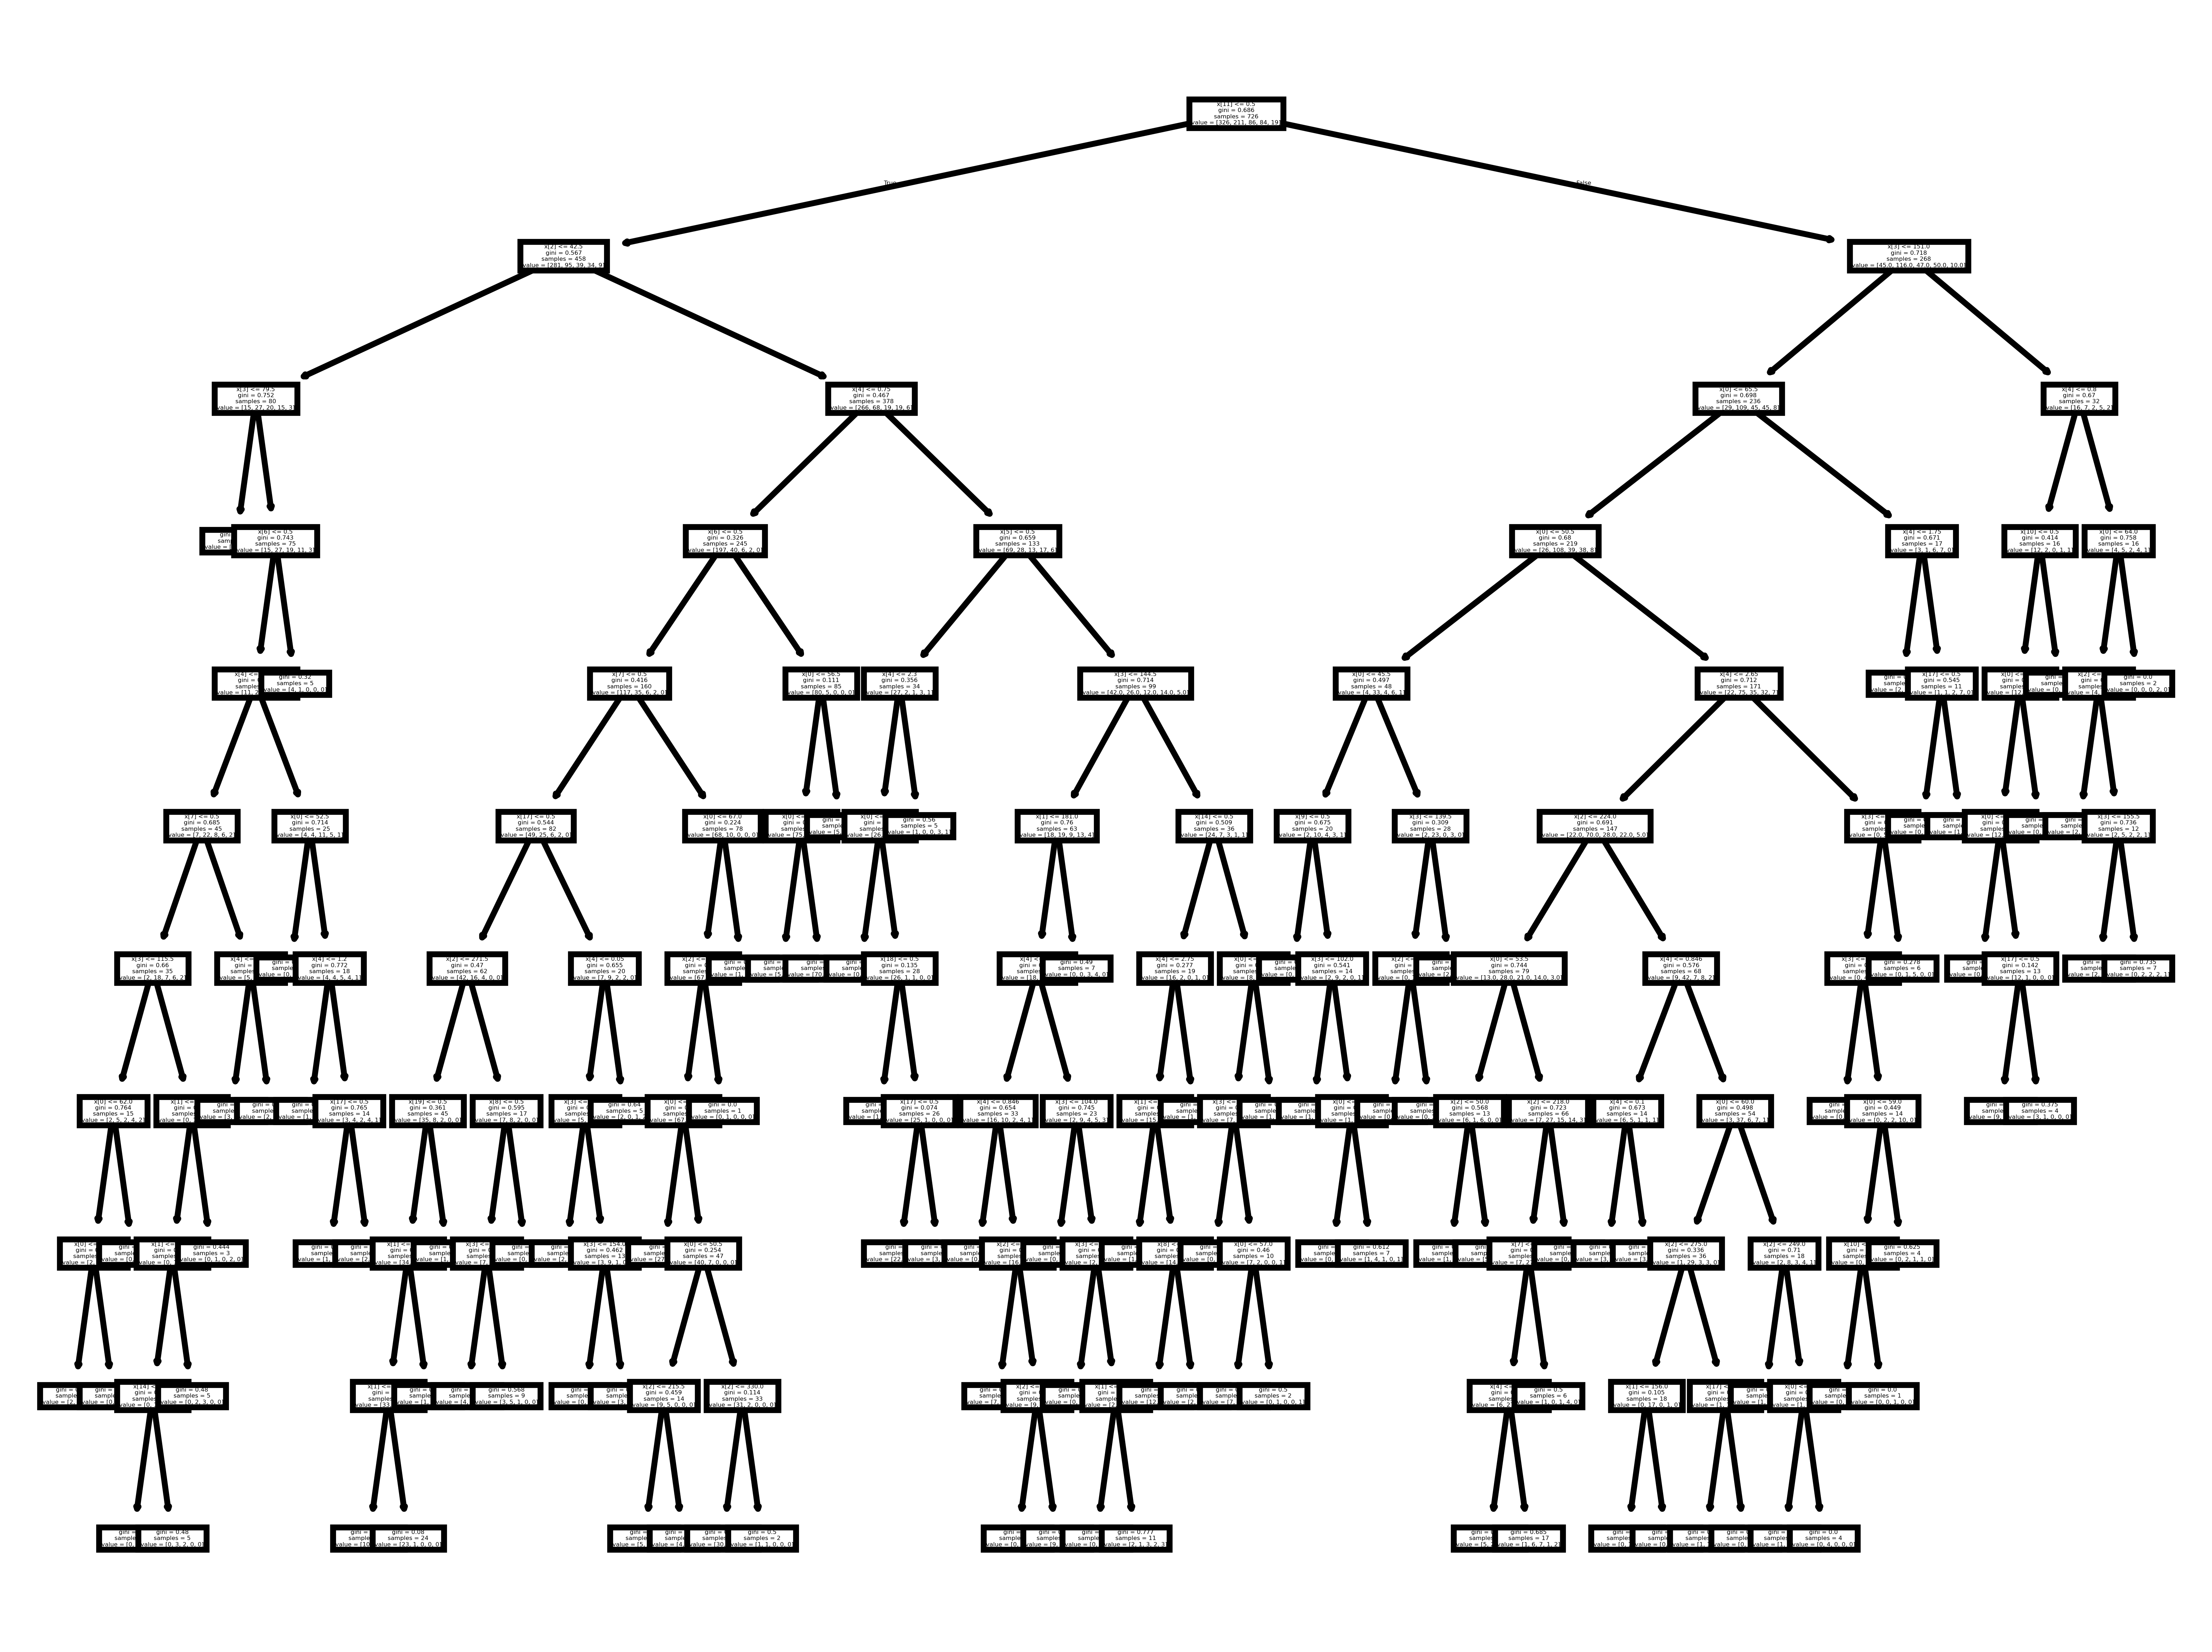

In [132]:
plt.figure(dpi = 1200)
tree.plot_tree(model3)

In [139]:
Final_model = DecisionTreeClassifier(max_depth = 10,min_samples_split = 5)

In [140]:
Final_model.fit(x_data,Y)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [141]:
print(classification_report(Y,Final_model.predict(x_data)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       399
           1       0.78      0.86      0.82       265
           2       0.80      0.75      0.78       109
           3       0.82      0.69      0.75       107
           4       0.82      0.50      0.62        28

    accuracy                           0.85       908
   macro avg       0.83      0.75      0.78       908
weighted avg       0.85      0.85      0.85       908



## Interview Questions

### 1. What are some common hyperparameteres of decision tree model, and how do they affect the model's performance ?

**max_depth** : limits how depp the tree can grow, if its value to too small then it will become a underfit model, it it's value is too high then the model becomes over fit model but a reasonable value of it will give a good fit model.

**min_samples_split** : sets the minimum number of samples required to split a node.

High value prevents the tree from creating small branches resulting prevents the model to overfitting, and lowe values can make the model more flexible but risk overfitting.

**max_leaf_nodes** : limits the number of leaf nodes in the tree.

**max_features** : limits the number of features considered when looking for the best split.

### 2. What is the difference between the Label Encoding and One-Hot Encoding ?

**One-Hot Encoding** : used to convert categorical data into numerical data,It creates columns to each class in the features, and in general one-hot encoding is used when there is categorical data in the input features(independent features).

**Label Encoder**: Used to covert categorical data into numerical data , It gives a number to each class in the feature,it replaces the label of the class with the number , In general the one-hot encoding is used to covert the categorical data in the output feature, or targer feature.
